# Excersise V: Cluster Analysis

## Imports

In [56]:
# imports

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# Scipy
from scipy import stats
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform
# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

In [73]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15, 7.5]

# Data

In [30]:
countries = pd.read_csv("../Data/countries_new.csv", encoding='latin-1', index_col=0)

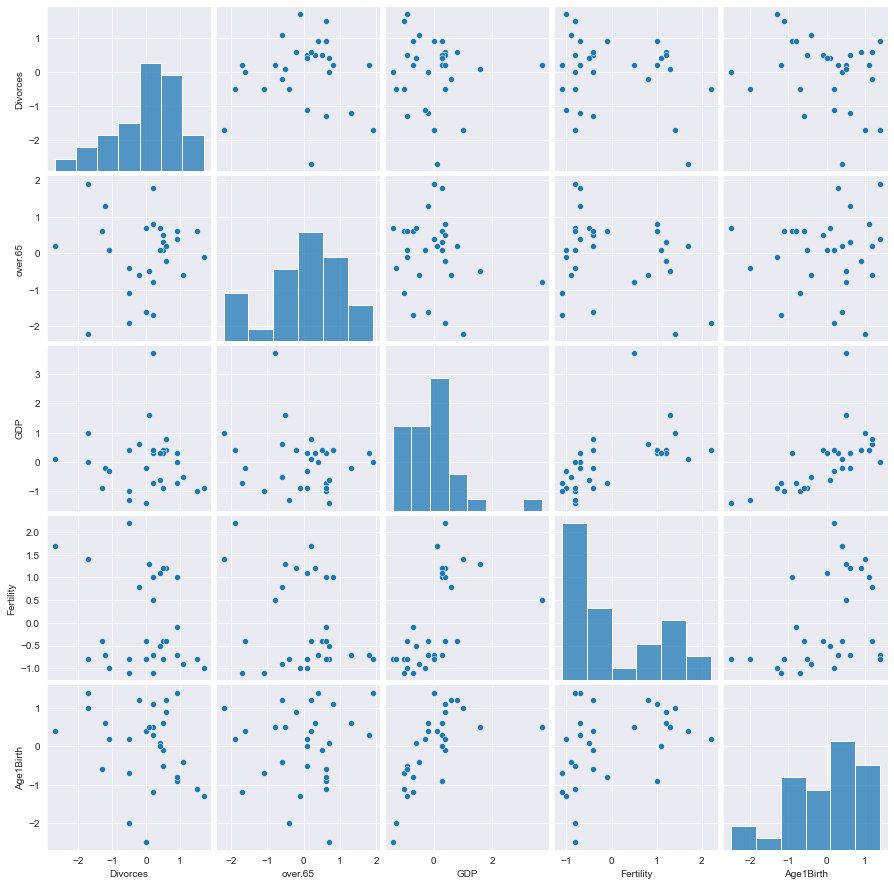

In [33]:
sns.pairplot(countries)

In [34]:
distance_matrix = pd.DataFrame(euclidean_distances(countries), index=countries.index, columns=countries.index)

<AxesSubplot:>

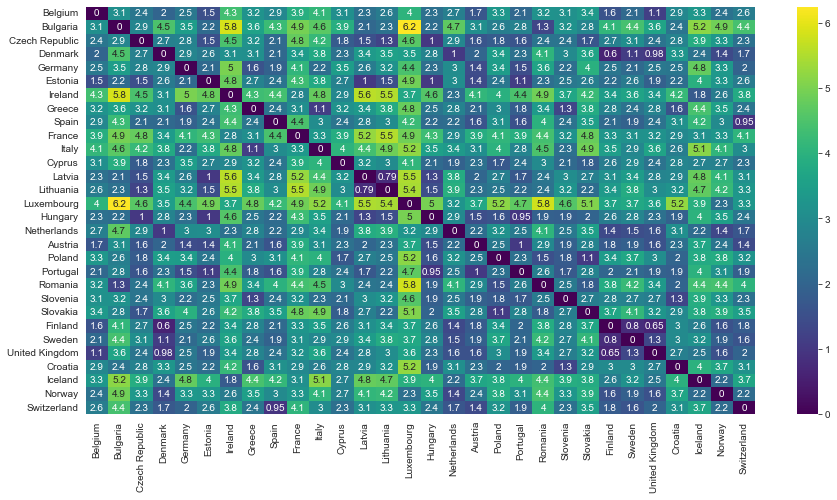

In [35]:
sns.heatmap(distance_matrix, annot=True, cmap='viridis')

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [39]:
countries.shape

(30, 5)

In [41]:
linkage(euclidean_distances(countries))

C:\Users\A200083283\AppData\Local\Temp\ipykernel_3256\3802503298.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage(euclidean_distances(countries))


array([[ 3.        , 23.        ,  1.60537371,  2.        ],
       [25.        , 30.        ,  1.769722  ,  3.        ],
       [12.        , 13.        ,  1.91770451,  2.        ],
       [24.        , 31.        ,  2.16184588,  4.        ],
       [ 8.        , 29.        ,  2.32584216,  2.        ],
       [17.        , 19.        ,  2.38971508,  2.        ],
       [ 5.        , 15.        ,  2.43668947,  2.        ],
       [16.        , 33.        ,  2.49422823,  5.        ],
       [ 2.        , 36.        ,  2.57473551,  3.        ],
       [18.        , 22.        ,  2.80576878,  2.        ],
       [21.        , 26.        ,  2.85422592,  2.        ],
       [35.        , 38.        ,  3.02163941,  5.        ],
       [28.        , 37.        ,  3.2398113 ,  6.        ],
       [ 1.        , 20.        ,  3.31601286,  2.        ],
       [ 0.        , 42.        ,  3.51902099,  7.        ],
       [ 7.        , 40.        ,  3.52650707,  3.        ],
       [34.        , 44.

C:\Users\A200083283\AppData\Local\Temp\ipykernel_3256\2986198410.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link_ward=linkage(euclidean_distances(countries), method="complete")


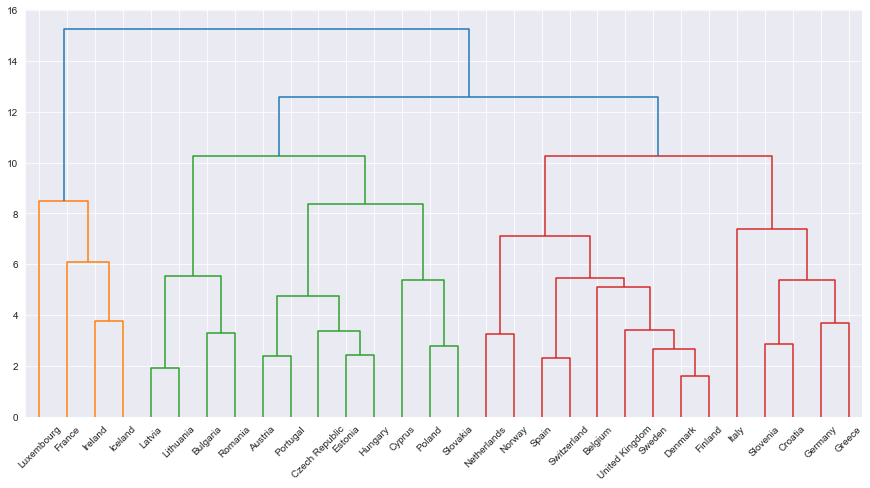

In [49]:
link_ward=linkage(euclidean_distances(countries), method="complete")
dn = dendrogram(link_ward, labels=countries.index.get_level_values(level=0))
plt.show()

In [58]:
Z = single(pdist(countries))
Z

array([[ 3.        , 23.        ,  0.6       ,  2.        ],
       [25.        , 30.        ,  0.64807407,  3.        ],
       [12.        , 13.        ,  0.78740079,  2.        ],
       [24.        , 31.        ,  0.8       ,  4.        ],
       [ 8.        , 29.        ,  0.9486833 ,  2.        ],
       [15.        , 19.        ,  0.9539392 ,  2.        ],
       [ 5.        , 32.        ,  1.01488916,  3.        ],
       [35.        , 36.        ,  1.01488916,  5.        ],
       [ 2.        , 37.        ,  1.01488916,  6.        ],
       [16.        , 33.        ,  1.04403065,  5.        ],
       [17.        , 38.        ,  1.04880885,  7.        ],
       [18.        , 22.        ,  1.09087121,  2.        ],
       [ 7.        , 10.        ,  1.14017543,  2.        ],
       [ 0.        , 39.        ,  1.14891253,  6.        ],
       [21.        , 26.        ,  1.28452326,  2.        ],
       [42.        , 44.        ,  1.30766968,  4.        ],
       [ 1.        , 20.

In [74]:
coph_corr = pd.DataFrame(squareform(cophenet(Z)), columns=countries.index, index=countries.index)
coph_corr

,Belgium,Bulgaria,Czech Republic,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Romania,Slovenia,Slovakia,Finland,Sweden,United Kingdom,Croatia,Iceland,Norway,Switzerland
Belgium,0.000000,1.606238,1.489966,1.148913,1.489966,1.489966,2.158703,1.596872,1.489966,2.83196,...,1.606238,1.596872,1.606238,1.148913,1.148913,1.148913,1.596872,2.158703,1.356466,1.489966
Bulgaria,1.606238,0.000000,1.606238,1.606238,1.606238,1.606238,2.158703,1.606238,1.606238,2.83196,...,1.311488,1.606238,1.536229,1.606238,1.606238,1.606238,1.606238,2.158703,1.606238,1.606238
Czech Republic,1.489966,1.606238,0.000000,1.489966,1.428286,1.014889,2.158703,1.596872,1.396424,2.83196,...,1.606238,1.596872,1.606238,1.489966,1.489966,1.489966,1.596872,2.158703,1.489966,1.396424
Denmark,1.148913,1.606238,1.489966,0.000000,1.489966,1.489966,2.158703,1.596872,1.489966,2.83196,...,1.606238,1.596872,1.606238,0.600000,0.800000,0.648074,1.596872,2.158703,1.356466,1.489966
Germany,1.489966,1.606238,1.428286,1.489966,0.000000,1.428286,2.158703,1.596872,1.428286,2.83196,...,1.606238,1.596872,1.606238,1.489966,1.489966,1.489966,1.596872,2.158703,1.489966,1.428286
Estonia,1.489966,1.606238,1.014889,1.489966,1.428286,0.000000,2.158703,1.596872,1.396424,2.83196,...,1.606238,1.596872,1.606238,1.489966,1.489966,1.489966,1.596872,2.158703,1.489966,1.396424
Ireland,2.158703,2.158703,2.158703,2.158703,2.158703,2.158703,0.000000,2.158703,2.158703,2.83196,...,2.158703,2.158703,2.158703,2.158703,2.158703,2.158703,2.158703,1.780449,2.158703,2.158703
Greece,1.596872,1.606238,1.596872,1.596872,1.596872,1.596872,2.158703,0.000000,1.596872,2.83196,...,1.606238,1.307670,1.606238,1.596872,1.596872,1.596872,1.307670,2.158703,1.596872,1.596872
Spain,1.489966,1.606238,1.396424,1.489966,1.428286,1.396424,2.158703,1.596872,0.000000,2.83196,...,1.606238,1.596872,1.606238,1.489966,1.489966,1.489966,1.596872,2.158703,1.489966,0.948683
France,2.831960,2.831960,2.831960,2.831960,2.831960,2.831960,2.831960,2.831960,2.831960,0.00000,...,2.831960,2.831960,2.831960,2.831960,2.831960,2.831960,2.831960,2.831960,2.831960,2.831960


<AxesSubplot:>

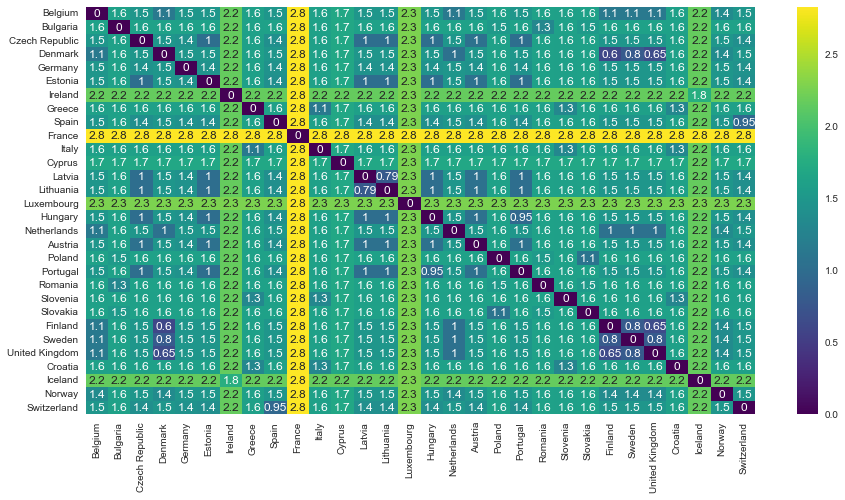

In [75]:
sns.heatmap(coph_corr, annot=True, cmap='viridis')

In [67]:
import os
os.environ["OMP_NUM_THREADS"]="1"


In [76]:
import warnings
warnings.filterwarnings('ignore')

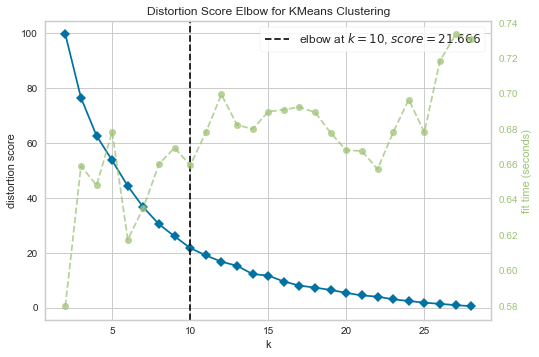

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
from sklearn.cluster import KMeans
# Elbow Method for K means# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2, 29), timings=True)
visualizer.fit(countries)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [86]:
km_model = KMeans(n_clusters=4).fit(countries)

In [91]:
countries['cluster'] = km_model.predict(countries)

In [103]:
cluster_melt=pd.melt(countries.groupby(['cluster']).mean().reset_index(), id_vars='cluster')
cluster_melt

,cluster,variable,value
0,0,Divorces,0.53
1,1,Divorces,-0.92
2,2,Divorces,-1.02
3,3,Divorces,0.44
4,0,over.65,-0.12
5,1,over.65,-1.04
6,2,over.65,1.14
7,3,over.65,0.05
8,0,GDP,-0.90
9,1,GDP,1.36


<AxesSubplot:xlabel='variable', ylabel='value'>

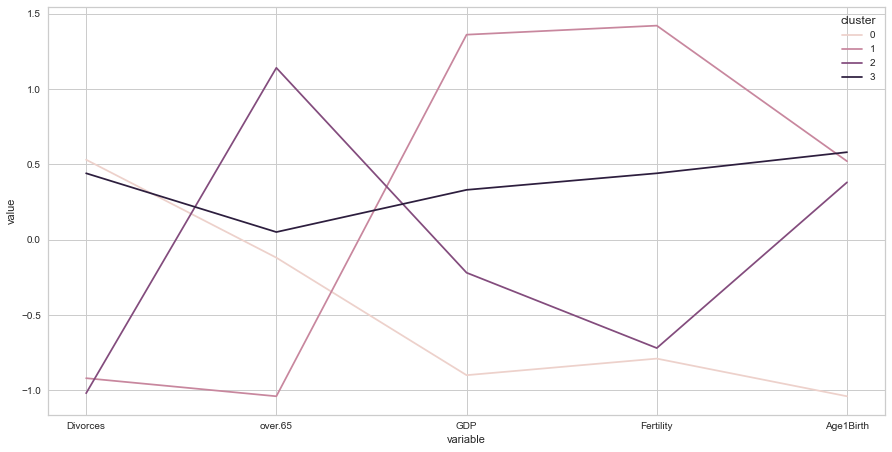

In [106]:
sns.lineplot(data=cluster_melt, x="variable", y="value", hue="cluster")

In [107]:
countries.columns

Index(['Divorces', 'over.65', 'GDP', 'Fertility', 'Age1Birth', 'cluster'], dtype='object')

<AxesSubplot:xlabel='Age1Birth', ylabel='Fertility'>

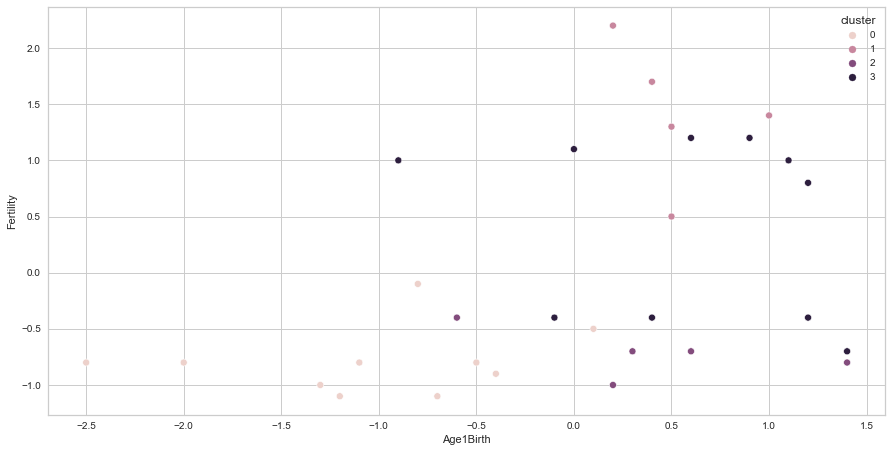

In [111]:
sns.scatterplot(data=countries, hue='cluster', y='Fertility', x='Age1Birth')